<a href="https://colab.research.google.com/github/solobala/ABD26/blob/main/ABD26_%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дан набор данных по оттоку клиентов. Набор данных содержит всего 5 000 записей (т.е. абонентов). Данные доступны тут - https://drive.google.com/open?id=1ArslqEEno2hrr5tAs25P0JN0P-coLcFD
Перечень полей:
state – штат;
account length – абонентский стаж;
area code – код региона;
phone number – номер телефона;
international plan – тарифный план для международных звонков;
voice mail plan – тарифный план для голосовой почты;
number vmail messages – количество сообщений голосовой почты;
total day minutes – общая длительность звонков в дневное время (мин);
total day calls – общее количество звонков в дневное время;
total day charge – общая стоимость звонков в дневное время;
total eve minutes – общая длительность звонков в вечернее время (мин);
total eve calls – общее количество звонков в вечернее время;
total eve charge – общая стоимость звонков в вечернее время;
total night minutes – общая длительность звонков в ночное время (мин);
total night calls – общее количество звонков в ночное время;
total night charge – общая стоимость звонков в ночное время;
total intl minutes – общая длительность международных звонков (мин);
total intl calls – общее количество международных звонков;
total intl charge – общая стоимость международных звонков;
number customer service calls – количество звонков в службу поддержки.
churned – покинул ли клиент компанию
Google Docs
churn.csv
Ваша задача используя pandas или pyspark ответить на следующие вопросы:

Построить гистограмму количества звонков в техническую поддержку
Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)
Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку
Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
Вывести top-5 самых много и самых мало говорящих клиентов
Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора  в зависимости от штата
перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark
Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)
Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке
%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F

# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

Построить гистограмму количества звонков в техническую поддержку

In [3]:
data = pd.read_csv('/content/churn.csv')
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


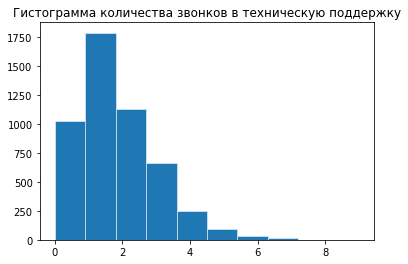

In [4]:
# data['number_customer_service_calls'].plot(kind='hist', title = 'Кол-во звонков в техподдержку')
fig, ax = plt.subplots()
ax.hist(x=data['number_customer_service_calls'], bins=10, linewidth=0.5, edgecolor="white")
ax.set_title('Гистограмма количества звонков в техническую поддержку')
plt.show()

Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны) 

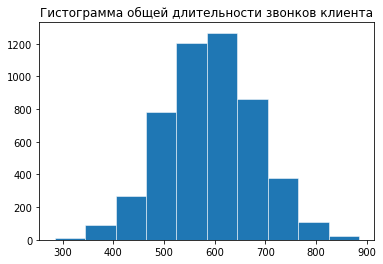

In [5]:
data['total_time'] = data['total_day_minutes'] + data['total_night_minutes'] + data['total_eve_minutes']+ data['total_intl_minutes']
fig, ax = plt.subplots()
ax.hist(x=data['total_time'], bins=10, linewidth=0.5, edgecolor="white")
ax.set_title('Гистограмма общей длительности звонков клиента')
plt.show()

Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку 

In [6]:

data['delta_x'] = data['total_time'] - data['total_time'].mean()
data['delta_y'] = (data['number_customer_service_calls']-data['number_customer_service_calls'].mean())
chisl = sum( data['delta_x']  * data['delta_y'])

znam = sqrt(sum(data['delta_x']**2) * sum(data['delta_y']**2))

pirson = chisl/ znam

In [7]:
pirson

-0.011407910827441239

In [8]:
data[['total_time', 'number_customer_service_calls']].corr(method='pearson')

,total_time,number_customer_service_calls
total_time,1.000000,-0.011408
number_customer_service_calls,-0.011408,1.000000


Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента 

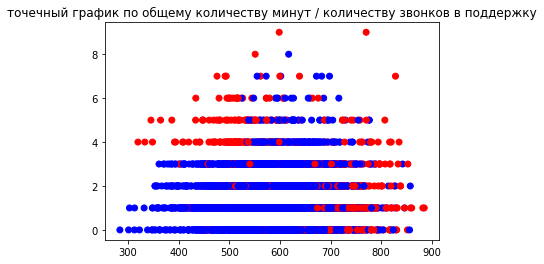

In [14]:
# С помощью matplotlib
fig, ax = plt.subplots()

colors = ['red', 'blue']
ax.scatter(x=data['total_time'], y=data['number_customer_service_calls'],  c=data['churned'].apply(lambda x: "red" if x else "blue") , vmin=0, vmax=100 )
ax.set_title('точечный график по общему количеству минут / количеству звонков в поддержку')
plt.show()

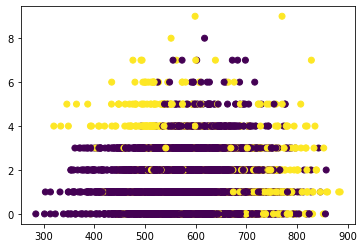

In [21]:
# с помощью встроенной в pamdas matplotlib
plt.scatter(data['total_time'], data['number_customer_service_calls'], c=data['churned'])

Вывести top-5 самых много и самых мало говорящих клиентов

In [22]:
data[['phone_number','total_time']].sort_values('total_time', ascending=True).head(5)

,phone_number,total_time
648,331-3174,284.3
1233,380-5246,301.5
3779,362-8044,303.2
1986,405-9233,313.0
992,375-8934,313.3


In [23]:
data[['phone_number','total_time']].sort_values('total_time', ascending=False).head(5)

,phone_number,total_time
985,345-9140,885.0
289,352-6976,882.2
3205,345-3787,860.2
4991,410-3888,858.2
4271,370-4667,857.4


Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора  в зависимости от штата

In [42]:
data['avg'] = data['total_day_charge']/data['total_day_minutes']

data.groupby('state').agg({'avg': 'mean', 'churned': 'mean' })



,avg,churned
state,,
AK,0.170002,0.069444
AL,0.170001,0.104839
AR,0.170003,0.173913
AZ,0.170002,0.101124
CA,0.170003,0.269231
CO,0.170002,0.114583
CT,0.170002,0.161616
DC,0.170009,0.102273
DE,0.170005,0.159574


перевести штат в one-hot формат при помощи pandas-функции get_dummies

In [46]:
df_dum = pd.get_dummies(data, columns=['state'])
df_dum.head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [48]:

df_dum.drop(columns=['phone_number', 'area_code','avg', 'total_time', 'delta_x', 'delta_y', 'international_plan', 'voice_mail_plan'], inplace=True)

In [49]:
df_dum.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 's

In [50]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(df_dum[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls',  'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY']], df_dum['churned'], test_size=0.2)

In [52]:
# привести данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [56]:
lr.score(X_test, y_test)

0.874

In [58]:
from sklearn.linear_model import RidgeClassifier
reg = RidgeClassifier()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.871

In [59]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.884

In [60]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.869

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.922

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.912

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.876

In [69]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.883

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.887

In [82]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.88